In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [165]:
data2 = pd.read_pickle('../data/events_and_avail_19-09-2019.pkl')
data2.head()

,avail_all_sold_out,avail_checked,avail_dollar_sold_metric,avail_first_tier,avail_last_tier,avail_mode,avail_percent_sold_out_types,avail_rank_sold_metric,avail_some_sold_out,avail_types_sold_out,...,seats_available,lat,long,country,city,venue,venue_id,event_url,ticketmaster_venue_id,sample_date
idx,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,None,Canada,Montréal,MTELUS,CA-HOST-402175,http://www.ticketmaster.ca/event/310056F9B8A15...,CA-HOST-402175,2019-09-19 14:44:20.775053-07:00
1.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,None,Canada,Montréal,L'Astral,CA-HOST-402290,http://www.ticketmaster.ca/event/310056EFDF994...,CA-HOST-402290,2019-09-19 14:44:20.775513-07:00
2.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,None,Canada,Québec,Centre Videotron,CA-HOST-402524,http://www.ticketmaster.ca/event/310056811BF45...,CA-HOST-402524,2019-09-19 14:44:20.775735-07:00
3.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,None,Canada,Montréal,L'Astral,CA-HOST-402290,http://www.ticketmaster.ca/event/310056CE01014...,CA-HOST-402290,2019-09-19 14:44:20.775947-07:00
4.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,None,Canada,Ottawa,National Arts Centre / Centre national des Arts,CA-HOST-401547,http://www.ticketmaster.ca/event/31005697BD743...,CA-HOST-401547,2019-09-19 14:44:20.776160-07:00


In [187]:
data = pd.read_pickle('../data/complete_15-09-2019.pkl')
data_head = data.head()
for col in data_head.columns:
    print(data_head[col])

0.0    109421
1.0    112539
2.0    113643
3.0    112541
4.0    112129
Name: ticketmaster_event_id, dtype: object
0.0                 Patchanka
1.0               Love Sensez
2.0                       BZB
3.0              Collie Buddz
4.0    Gimme Shelter Festival
Name: performers, dtype: object
0.0    10001
1.0    10001
2.0    10001
3.0    10001
4.0    10001
Name: cat, dtype: object
0.0    cap
1.0    cap
2.0    cap
3.0    cap
4.0    cap
Name: domain, dtype: object
0.0       5
1.0     201
2.0       1
3.0    1258
4.0       1
Name: subcat, dtype: object
0.0    Europe/Amsterdam
1.0    Europe/Amsterdam
2.0    Europe/Amsterdam
3.0    Europe/Amsterdam
4.0    Europe/Amsterdam
Name: timezone, dtype: object
0.0    2017-01-01 00:00:00+01:00
1.0    2017-01-01 00:00:00+01:00
2.0    2017-01-01 00:00:00+01:00
3.0    2017-01-01 00:00:00+01:00
4.0    2017-01-01 00:00:00+01:00
Name: on_sale_date, dtype: object
0.0    2023-06-28 21:15:00+02:00
1.0    2023-06-28 22:00:00+02:00
2.0    2023-06-29 20:00:00+02

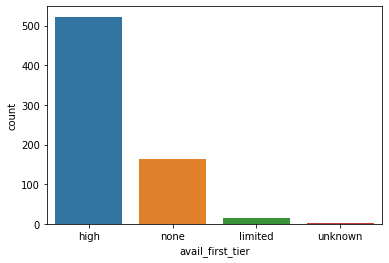

In [188]:
sns.countplot(x='avail_first_tier',data=data)
plt.show()
#Limited and none can be grouped together, and unknown should be dropped.

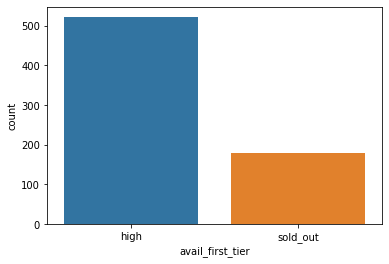

In [189]:
data = data.loc[data['avail_first_tier']!='unknown',:]
data.loc[data['avail_first_tier']=='limited','avail_first_tier'] = 'none'
data.loc[data['avail_first_tier']=='none','avail_first_tier'] = 'sold_out'
sns.countplot(x='avail_first_tier',data=data)
plt.show()

In [190]:
data.loc[data['day_of_week']=='none',:] = np.nan
data = data.dropna(how='all')

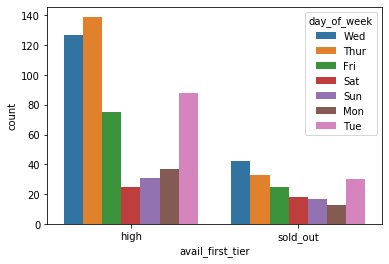

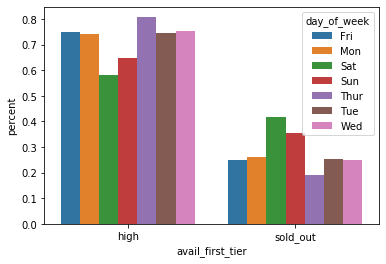

In [191]:
sns.countplot(x='avail_first_tier', hue='day_of_week', data=data)
plt.show()

data_per_weekday_and_type = data.groupby(['avail_first_tier','day_of_week']).count()['ticketmaster_event_id']
data_per_weekday_and_type.name = 'count'
data_per_weekday_and_type = data_per_weekday_and_type.reset_index()
data_per_weekday = data_per_weekday_and_type.reset_index().groupby('day_of_week').sum().reset_index()
data_per_weekday = data_per_weekday.rename({'count':'total'}, axis=1)
counts = pd.merge(data_per_weekday_and_type, data_per_weekday, on='day_of_week')
counts['percent'] = counts['count']/counts['total']
sns.barplot(x='avail_first_tier', y='percent', hue='day_of_week', data=counts)
plt.show()

The lower plot is by percent availability compared to total. We can see that sat and fri concerts sell out more readily (more sold out compared to others, less 'high')

In [192]:
#Lets make a new variable of "weekend vs weekday":
data['weekend_event'] = data['day_of_week'].isin(['Sat','Sun'])
data['population'] = data['city_population']

C:\Users\bdyet\Anaconda3\envs\insight\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


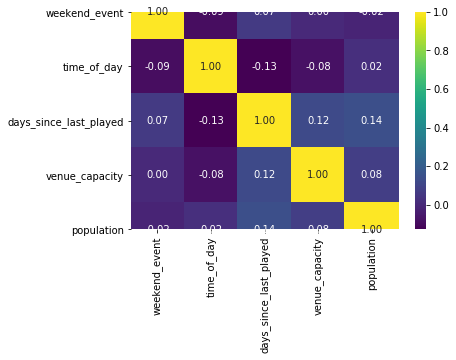

,weekend_event,time_of_day,days_since_last_played,venue_capacity,population
weekend_event,1.000000,-0.090279,0.065198,0.000451,-0.016899
time_of_day,-0.090279,1.000000,-0.127918,-0.075784,0.024983
days_since_last_played,0.065198,-0.127918,1.000000,0.123477,0.143196
venue_capacity,0.000451,-0.075784,0.123477,1.000000,0.076500
population,-0.016899,0.024983,0.143196,0.076500,1.000000


In [193]:
%matplotlib inline
data = data.loc[data['time_of_day'] != 'none',:]
IVs = ['weekend_event','time_of_day','days_since_last_played','venue_capacity','population']
DV = ['avail_first_tier']
clean_data = data[IVs].dropna()
clean_data = clean_data.apply(lambda x: pd.to_numeric(x, errors='ignore'), axis=1)
_=sns.heatmap(clean_data.corr(), annot=True, fmt = ".2f", cmap = "viridis")
plt.show()
clean_data.corr()

Its very interesting that the time on sale is correlated with the population!
This must be something the ticketing venues do on purpose, or it could be a function of the larger venues or more options available?

In [194]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
clean_data = data[IVs+DV].dropna()
X=clean_data[IVs]
y=clean_data[DV]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Length of train set: \t %f' % len(X_train))
print('Length of test set: \t %f\n' % len(X_test))

Length of train set: 	 184.000000
Length of test set: 	 46.000000



In [195]:
from sklearn.ensemble import RandomForestClassifier
import pickle
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
pickle.dump((random_forest, IVs, DV), open('../models/random_forest_19-09-2019.pkl','wb'))

C:\Users\bdyet\Anaconda3\envs\insight\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bdyet\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Validate model

Accuracy: 0.652174

Performance

              precision    recall  f1-score   support

        high       0.75      0.75      0.75        32
    sold_out       0.43      0.43      0.43        14

    accuracy                           0.65        46
   macro avg       0.59      0.59      0.59        46
weighted avg       0.65      0.65      0.65        46

Confusion Matrix

[[24  8]
 [ 8  6]]


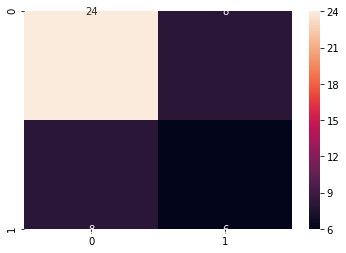

In [196]:
print('Validate model\n')
ytest_true, ytest_pred = np.asarray(y_test), random_forest.predict(X_test)
ytest_true= [x for xs in np.array(ytest_true) for x in xs]
ytest_true_prob, ytest_pred_prob = y_test, random_forest.predict_proba(X_test)[:, 1] # take pred of being 1

# accuracy
print('Accuracy: %f\n' % random_forest.score(X_test, y_test))

# classification report
print('Performance\n')
from sklearn.metrics import classification_report
print(classification_report(ytest_true, ytest_pred))

# confusion matrix
print('Confusion Matrix\n')
from sklearn.metrics import confusion_matrix
_=cm=confusion_matrix(ytest_true, ytest_pred)
_=sns.heatmap(cm,annot=True,fmt="d")
print(cm)

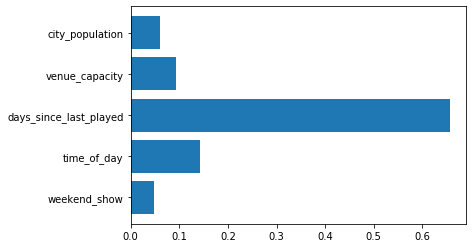

In [161]:
# view feature importance
def f_importances(coef, names):
    plt.barh(range(len(names)), coef, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
f_importances(random_forest.feature_importances_, IVs)